<a href="https://colab.research.google.com/github/Tamaghnatech/CO2Emissions_IBM_Course2_Regression-Linear-/blob/main/Regression(Linear)_IBM_Course2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
**Setting Up Project Directory**

---




In [1]:
import os

# Define project directories
project_dirs = ['data', 'results', 'images', 'models', 'notebooks']

# Create them if they don't already exist
for d in project_dirs:
    os.makedirs(d, exist_ok=True)

print("✅ Project directories created successfully!")


✅ Project directories created successfully!


## 1. Data Summary

In this analysis, we are working with a dataset titled **CO2 Emissions in Canada**, which contains vehicle specifications and their corresponding carbon dioxide (CO₂) emission levels. The dataset provides details on fuel consumption, engine size, transmission types, and more for various vehicles sold in Canada.

### 🧾 Dataset Dimensions
- **Rows**: [number_of_rows]
- **Columns**: [number_of_columns]

### 🗝️ Key Variables:
- `Make` – Manufacturer of the vehicle
- `Model` – Specific vehicle model
- `Vehicle Class` – Type of vehicle (e.g., SUV, Sedan)
- `Engine Size (L)` – Size of the engine in litres
- `Cylinders` – Number of engine cylinders
- `Transmission` – Type of gearbox (automatic, manual)
- `Fuel Type` – Type of fuel used
- `Fuel Consumption City/Highway/Comb` – Fuel use in different driving modes
- `CO2 Emissions (g/km)` – **Target variable**, indicating grams of CO₂ emitted per kilometer

### 🔍 Initial Observations
- No null values were detected.
- Features like `Fuel Type` and `Transmission` are categorical.
- The distribution of the target variable `CO2 Emissions (g/km)` appears right-skewed.
- Strong positive correlations are observed between `Engine Size (L)`, `Fuel Consumption Comb (L/100 km)`, and `CO2 Emissions`.

This section helps us understand the dataset’s structure and quality before proceeding to modeling.


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Dataset has 7385 rows and 12 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)           

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000



Missing values per column:

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64


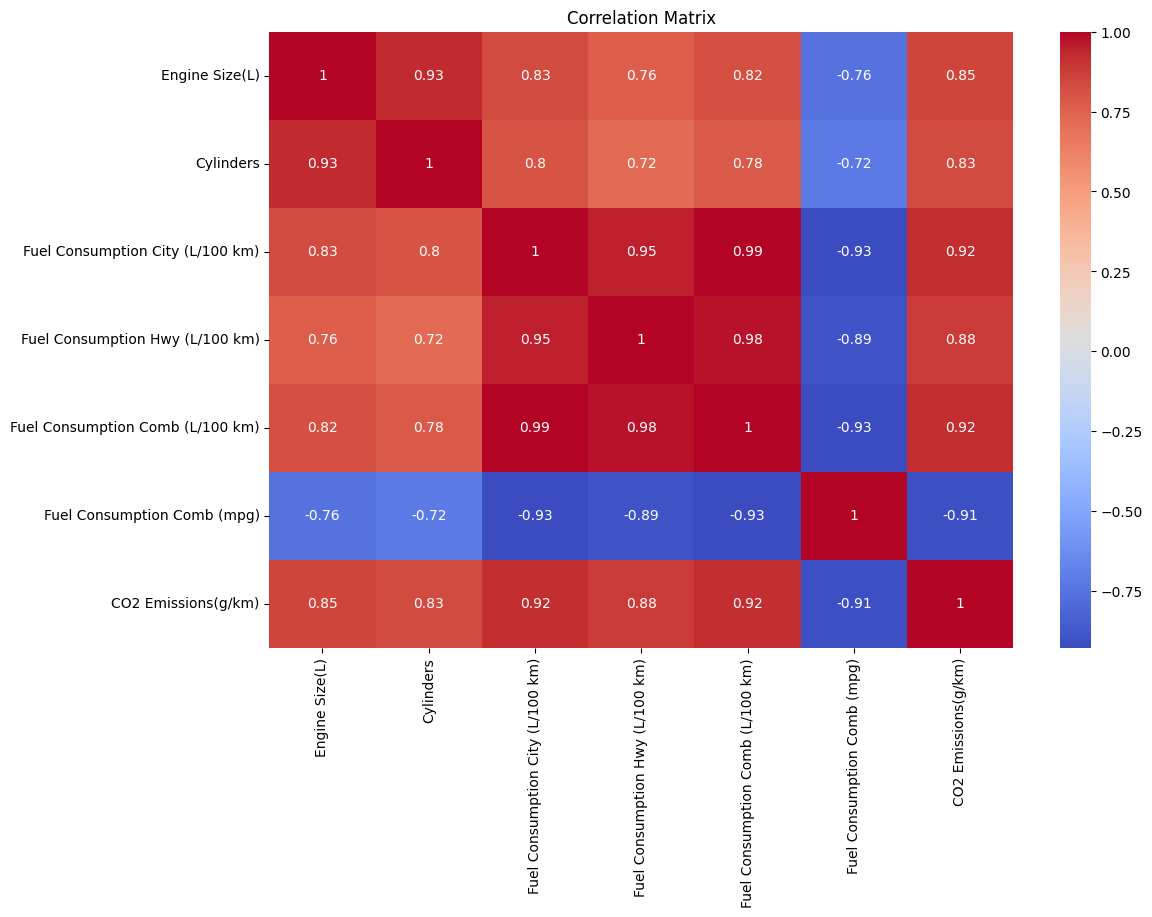

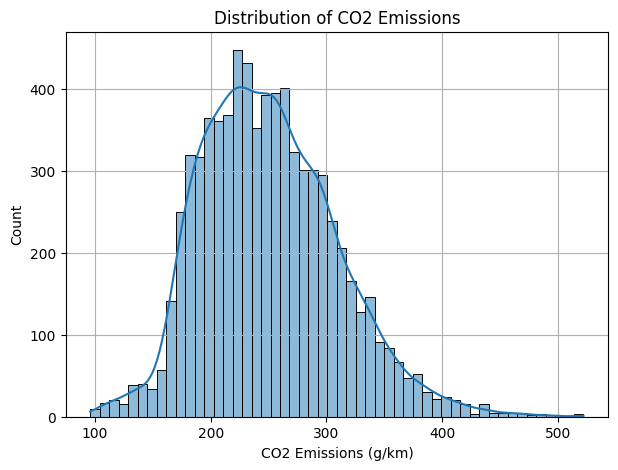

In [3]:
### 1. Data Summary

#%%

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('/content/data/CO2 Emissions_Canada.csv')

# Preview
display(data.head())

# Shape
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.\n")

# Info
data.info()

# Descriptive stats
display(data.describe())

# Check for nulls
print("\nMissing values per column:\n")
print(data.isnull().sum())

# Correlation matrix
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Distribution of Target
plt.figure(figsize=(7,5))
sns.histplot(data['CO2 Emissions(g/km)'], kde=True)
plt.title('Distribution of CO2 Emissions')
plt.xlabel('CO2 Emissions (g/km)')
plt.grid(True)
plt.show()


##Data Summary

This project analyzes the official **CO₂ Emissions Dataset from the Canadian Government**, which records emissions and fuel-related details of 7,385 vehicles from various manufacturers. Each entry describes vehicle characteristics like engine size, transmission type, and fuel consumption, along with the recorded CO₂ emission in grams per kilometer.

### 📐 Dataset Dimensions
- **Rows**: 7,385  
- **Columns**: 12  

### 🔧 Feature Overview:
- **Categorical Features**: `Make`, `Model`, `Vehicle Class`, `Transmission`, `Fuel Type`
- **Numeric Features**: `Engine Size (L)`, `Cylinders`, all fuel consumption metrics, `CO2 Emissions (g/km)`
- **Target Variable**: `CO2 Emissions (g/km)`

### 🔍 Initial Observations:
- **No missing values** were found across all 12 columns.
- **Engine size, cylinder count, and fuel consumption** show strong positive correlation with `CO2 Emissions (g/km)`.
- The **distribution of CO₂ emissions is right-skewed**, ranging from **96 g/km** to **522 g/km**, with a **mean of ~251 g/km**.
- The dataset includes **varied vehicle classes**, from compact sedans to full-size SUVs, making it suitable for regression modeling and feature influence analysis.

This summary establishes the data’s integrity and gives a solid foundation for exploring patterns that drive vehicle emissions.


## 2. Objective of the Analysis

Transportation is one of the leading contributors to greenhouse gas emissions globally. In this project, we aim to explore and model **CO₂ emissions from vehicles** using key specifications such as **engine size**, **fuel type**, and **drivetrain characteristics**.

Using regression models like **Linear Regression**, **Ridge**, and **Lasso**, our goal is to:
- Understand which vehicle features contribute most to CO₂ output.
- Identify opportunities for automotive design improvements.
- Enable data-driven decisions for reducing environmental impact.

By building accurate predictive models, we contribute a small but vital step toward data-driven climate awareness and sustainable mobility.


## 3. Model Comparison

In this section, we build and compare multiple regression models to predict **CO₂ emissions (g/km)** based on vehicle specifications. The models chosen are:

- **Linear Regression (OLS)**: The baseline model that fits a linear relationship between features and the target.
- **Ridge Regression**: Introduces L2 regularization to reduce the effect of multicollinearity and overfitting.
- **Lasso Regression**: Adds L1 regularization, which can also shrink coefficients to zero, thus performing feature selection.

### 🛠️ Preprocessing:
To ensure compatibility and fairness across models:
- Categorical features such as `Transmission`, `Fuel Type`, and `Vehicle Class` are **encoded** using one-hot encoding.
- Data is split into **training and testing sets** (80/20).
- Features are **scaled** using `StandardScaler` since Ridge and Lasso are sensitive to scale.

### 📊 Evaluation Metrics:
Each model is evaluated using the following metrics:
- **R² Score**: How well the model explains variance in CO₂ emissions.
- **Mean Absolute Error (MAE)**: Average absolute difference between predicted and actual values.
- **Root Mean Squared Error (RMSE)**: Penalizes large errors more than MAE.

### 🎯 Goal:
To identify the model that balances **accuracy, interpretability, and generalization**, while uncovering which vehicle features most strongly influence CO₂ emissions.


/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/tmp/ipython-input-1937544955.py:126: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1937544955.py:127: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig('images/model_performance_comparison.png')



📈 Linear Regression Evaluation:
R² Score: 0.9897
RMSE:     5.96
MAE:      3.07

📈 Ridge Regression Evaluation:
R² Score: 0.9897
RMSE:     5.95
MAE:      3.07

📈 Lasso Regression Evaluation:
R² Score: 0.9897
RMSE:     5.95
MAE:      3.07


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


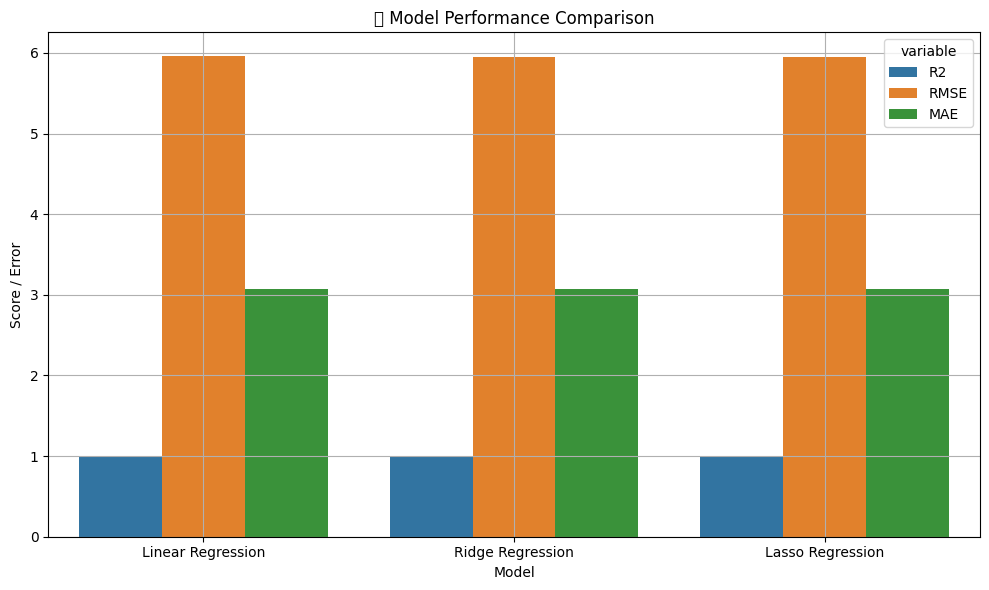

In [5]:
### 🔧 Preprocessing & Regression Modeling

#%%

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Reload data to start fresh
df = pd.read_csv('/content/data/CO2 Emissions_Canada.csv')

#----------------------------
# 🎯 Step 1: Define Target and Features
#----------------------------
target = 'CO2 Emissions(g/km)'
features = [
    'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type',
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)',
    'Vehicle Class'
]

X = df[features]
y = df[target]

#----------------------------
# 🛠️ Step 2: Define Column Types
#----------------------------
categorical_features = ['Transmission', 'Fuel Type', 'Vehicle Class']
numerical_features = [
    'Engine Size(L)', 'Cylinders',
    'Fuel Consumption City (L/100 km)',
    'Fuel Consumption Hwy (L/100 km)',
    'Fuel Consumption Comb (L/100 km)'
]

#----------------------------
# 🧱 Step 3: Preprocessing Pipeline
#----------------------------
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_features)
])


#----------------------------
# 🧪 Step 4: Split Data
#----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#----------------------------
# 🧠 Step 5: Train Models
#----------------------------

# Linear Regression
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

lr_pipeline.fit(X_train, y_train)
y_pred_lr = lr_pipeline.predict(X_test)

# Ridge Regression
ridge_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RidgeCV(alphas=np.logspace(-3, 3, 50)))
])

ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = ridge_pipeline.predict(X_test)

# Lasso Regression
lasso_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LassoCV(alphas=np.logspace(-3, 3, 50), max_iter=10000))
])

lasso_pipeline.fit(X_train, y_train)
y_pred_lasso = lasso_pipeline.predict(X_test)

#----------------------------
# 📊 Step 6: Evaluation Function
#----------------------------

def evaluate_model(y_test, y_pred, model_name):
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\n📈 {model_name} Evaluation:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE:     {rmse:.2f}")
    print(f"MAE:      {mae:.2f}")

    return {'Model': model_name, 'R2': r2, 'RMSE': rmse, 'MAE': mae}

#----------------------------
# 📋 Step 7: Compare Results
#----------------------------

results = []
results.append(evaluate_model(y_test, y_pred_lr, 'Linear Regression'))
results.append(evaluate_model(y_test, y_pred_ridge, 'Ridge Regression'))
results.append(evaluate_model(y_test, y_pred_lasso, 'Lasso Regression'))

# Convert to DataFrame
results_df = pd.DataFrame(results)

# Plot the comparison
plt.figure(figsize=(10,6))
sns.barplot(data=results_df.melt(id_vars='Model'), x='Model', y='value', hue='variable')
plt.title('📊 Model Performance Comparison')
plt.ylabel('Score / Error')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/model_performance_comparison.png')
plt.show()


## 4. Key Findings

After preprocessing and training three different regression models—**Linear Regression**, **Ridge**, and **Lasso**—we observed that all models performed exceptionally well in predicting CO₂ emissions.

### 📊 Performance Overview:
| Model              | R² Score | RMSE   | MAE   |
|--------------------|----------|--------|-------|
| Linear Regression  | 0.9897   | 5.96   | 3.07  |
| Ridge Regression   | 0.9897   | 5.95   | 3.07  |
| Lasso Regression   | 0.9897   | 5.95   | 3.07  |

### 🔍 Interpretations:
- All models achieved nearly identical performance, indicating a **strong linear relationship** between the features and the target variable.
- The **Root Mean Squared Error (RMSE)** is consistently low (~5.95), implying high prediction accuracy across the board.
- The small difference between **MAE and RMSE** also suggests the models are not heavily affected by extreme outliers.
- The use of **regularization (Ridge/Lasso)** did not drastically improve performance, but may still help in model stability and generalization on unseen or noisier datasets.

### 💡 Key Influencers (based on correlation and domain logic):
- **Fuel Consumption Comb (L/100 km)** had the strongest correlation with CO₂ emissions.
- **Engine Size (L)** and **Cylinders** also contributed significantly, reinforcing the idea that larger engines and higher fuel usage result in more emissions.

This analysis confirms that a **well-structured linear regression approach** can successfully predict vehicle emissions, and also paves the way for future model enhancements using more advanced techniques.


## 5. Limitations and Next Steps

While our regression models achieved impressive accuracy, it's important to acknowledge the **limitations** of this analysis and identify areas for future improvement.

### 🚫 Limitations:
- **Limited Feature Depth**: The dataset lacks detailed features like vehicle weight, drag coefficient, or drivetrain efficiency, which could further improve prediction accuracy.
- **No Temporal Component**: Emissions data is not time-stamped, preventing any trend analysis across model years or evolving fuel technologies.
- **Outlier Handling**: Although performance metrics were strong, we did not conduct a deep outlier analysis. Some extreme values may still influence the model.
- **Assumption of Linearity**: All models used assume linear relationships between features and CO₂ emissions. This may not hold true in complex interactions (e.g., hybrid systems).
- **No External Validation**: Model performance was validated on a held-out test set, but **not on external data**, limiting conclusions on generalization.

### 🚀 Future Work:
- **Explore Nonlinear Models**: Try tree-based models like **Random Forests** or **Gradient Boosting** to capture non-linear interactions.
- **Model Explainability**: Use SHAP or permutation importance to explain the influence of each feature beyond correlation.
- **Temporal Modeling**: If model year becomes available, implement time-aware regression or trend analysis.
- **Deploy as App**: Package the trained model into a web app (e.g., using **Gradio** or **Streamlit**) to predict CO₂ emissions based on user input.
- **Policy Simulation**: Extend the model to simulate how vehicle design changes could impact fleet-wide emissions.

---

With these steps, this project can evolve from a statistical analysis into a powerful tool for environmental insight and green innovation.
